In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns

%matplotlib inline

## Параметры задачи

In [2]:
p = 0.04
R = 0.01
n = 100
m = 300

EPS = 0.1

## Вид заданной матрицы корреляции

In [3]:
target_corr_mat = (np.ones((n, n), dtype=int) - np.diag([1] * n)) * R + np.diag([1] * n)
target_corr_mat

array([[1.  , 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 1.  , 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 1.  , ..., 0.01, 0.01, 0.01],
       ...,
       [0.01, 0.01, 0.01, ..., 1.  , 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 1.  , 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 1.  ]])

## Стартовый вид векторов X_1, X_2, ...

In [4]:
sample_mat = np.vstack([np.ones((int(p * m), n), dtype=int), np.zeros((m - int(p * m), n), dtype=int)])
sample_mat = pd.DataFrame(sample_mat, columns=['X' + str(i) for i in range(n)])
sample_mat

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Вид матрицы корреляции в начальный момент времени

In [5]:
corr_mat = sample_mat.corr()
corr_mat

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
X0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
X1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
X2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
X3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
X4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X95,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
X96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
X97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
X98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Описание функций для сравнения матриц корреляции и функции-оптимизатора

In [6]:
def corr_mat_mse(corr_mat):
    target_corr_mat = (np.ones((n, n), dtype=int) - np.diag([1] * n)) * R + np.diag([1] * n)
    result = (target_corr_mat - corr_mat) ** 2
    result = result.sum()
    return result


def corr_mat_mae(corr_mat):
    target_corr_mat = (np.ones((n, n), dtype=int) - np.diag([1] * n)) * R + np.diag([1] * n)
    result = abs(target_corr_mat - corr_mat)
    result = result.sum()
    return result


def corr_mat_optimizer(metric, p, n, m, EPS=0.1):
    sample_mat = np.vstack([np.ones((int(p * m), n), dtype=int), np.zeros((m - int(p * m), n), dtype=int)])
    sample_mat = pd.DataFrame(sample_mat, columns=['X' + str(i) for i in range(n)])
    target_corr_mat = (np.ones((n, n), dtype=int) - np.diag([1] * n)) * R + np.diag([1] * n)

    error_lst = []
    var_lst = []

    corr_count = (np.abs(sample_mat.corr().to_numpy() - target_corr_mat) > EPS).sum()

    # for _ in tqdm(range(itr_count)):
    while corr_count > 0:
        column_ind = rnd.choice(sample_mat.columns)
        row_ind_1 = rnd.choice(sample_mat.index[sample_mat.loc[:, column_ind] == 0])
        row_ind_2 = rnd.choice(sample_mat.index[sample_mat.loc[:, column_ind] == 1])

        corr_mat = sample_mat.corr().to_numpy()
        old_mse = metric(corr_mat)
        
        sample_mat.loc[[row_ind_1, row_ind_2], column_ind] = sample_mat.loc[[row_ind_2, row_ind_1], column_ind].values

        corr_mat = sample_mat.corr().to_numpy()
        new_mse = metric(corr_mat)
        
        if new_mse >= old_mse:
            sample_mat.loc[[row_ind_1, row_ind_2], column_ind] = sample_mat.loc[[row_ind_2, row_ind_1], column_ind].values

        error_lst.append(np.minimum(old_mse, new_mse))
        var_lst.append(np.var(sample_mat.sum(axis=1)))

        new_corr_count = (np.abs(sample_mat.corr().to_numpy() - target_corr_mat) >= EPS).sum()

        if (new_corr_count < corr_count):
            print(f'Correlated yet: {new_corr_count}')

        corr_count = new_corr_count

    return sample_mat, error_lst, var_lst

def plot_err(err_lst, car_lst, method_name):
    plt.plot(range(len(err_lst)), err_lst)
    plt.title(f'{method_name} error')
    plt.xlabel('Iteratin')
    plt.ylabel(method_name)
    plt.grid()
    plt.show()

    plt.plot(range(len(var_lst)), var_lst)
    plt.title('X_sum var')
    plt.xlabel('Iteratin')
    plt.ylabel('Var')
    plt.grid()
    plt.show()

## Запуск с использованием в качестве метрики схожести MAE

Correlated yet: 9898
Correlated yet: 9896
Correlated yet: 9894
Correlated yet: 9892
Correlated yet: 9890
Correlated yet: 9888
Correlated yet: 9882
Correlated yet: 9876
Correlated yet: 9874
Correlated yet: 9872
Correlated yet: 9868
Correlated yet: 9866
Correlated yet: 9864
Correlated yet: 9862
Correlated yet: 9858
Correlated yet: 9854
Correlated yet: 9850
Correlated yet: 9846
Correlated yet: 9842
Correlated yet: 9840
Correlated yet: 9826
Correlated yet: 9822
Correlated yet: 9820
Correlated yet: 9818
Correlated yet: 9816
Correlated yet: 9812
Correlated yet: 9810
Correlated yet: 9806
Correlated yet: 9804
Correlated yet: 9790
Correlated yet: 9786
Correlated yet: 9778
Correlated yet: 9774
Correlated yet: 9770
Correlated yet: 9768
Correlated yet: 9760
Correlated yet: 9758
Correlated yet: 9754
Correlated yet: 9750
Correlated yet: 9746
Correlated yet: 9742
Correlated yet: 9736
Correlated yet: 9734
Correlated yet: 9732
Correlated yet: 9730
Correlated yet: 9728
Correlated yet: 9722
Correlated ye

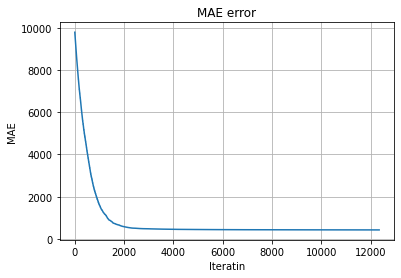

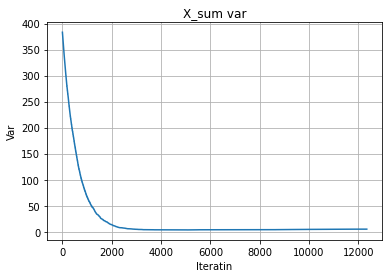

Error: 427.7702777777825
Var: 4.886666666666667


In [7]:
sample_mat, err_lst, var_lst = corr_mat_optimizer(corr_mat_mae, p, n, m, EPS=EPS)

plot_err(err_lst, var_lst, 'MAE')
print(f'Error: {err_lst[-1]}')
print(f'Var: {var_lst[-1]}')

## Проверим насколько близка наша матрица корреляции к матрице cо значениями R вне главной диагонали

Количество элементов матрицы корреляции, отличающихся от заданной с 0.01 вне диагонали, более чем на 0.1: 0


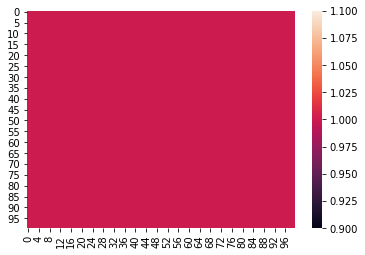

In [8]:
sns.heatmap(np.abs(sample_mat.corr().to_numpy() - target_corr_mat) < EPS)
print(f'Количество элементов матрицы корреляции, отличающихся от заданной с {R} вне диагонали, более чем на {EPS}: {(np.abs(sample_mat.corr().to_numpy() - target_corr_mat) > EPS).sum()}')

## Вид самой матрицы корреляции

In [9]:
sample_mat.corr()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
X0,1.000000,-0.041667,-0.041667,-0.041667,-0.041667,0.045139,0.045139,0.045139,0.045139,-0.041667,...,0.045139,0.045139,-0.041667,0.045139,-0.041667,0.045139,-0.041667,0.045139,0.045139,0.045139
X1,-0.041667,1.000000,-0.041667,-0.041667,0.045139,0.045139,0.045139,-0.041667,0.045139,0.045139,...,-0.041667,0.045139,0.045139,0.045139,-0.041667,0.045139,-0.041667,0.045139,0.045139,-0.041667
X2,-0.041667,-0.041667,1.000000,-0.041667,0.045139,-0.041667,-0.041667,-0.041667,-0.041667,0.045139,...,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,0.045139,-0.041667,0.045139,-0.041667,0.045139
X3,-0.041667,-0.041667,-0.041667,1.000000,-0.041667,0.045139,0.045139,-0.041667,0.045139,-0.041667,...,-0.041667,0.045139,0.045139,-0.041667,0.045139,-0.041667,0.045139,-0.041667,0.045139,0.045139
X4,-0.041667,0.045139,0.045139,-0.041667,1.000000,-0.041667,0.045139,-0.041667,0.045139,-0.041667,...,-0.041667,0.045139,-0.041667,0.045139,0.045139,0.045139,0.045139,-0.041667,0.045139,-0.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X95,0.045139,0.045139,0.045139,-0.041667,0.045139,0.045139,-0.041667,-0.041667,0.045139,-0.041667,...,-0.041667,-0.041667,0.045139,0.045139,-0.041667,1.000000,-0.041667,-0.041667,-0.041667,0.045139
X96,-0.041667,-0.041667,-0.041667,0.045139,0.045139,0.045139,-0.041667,-0.041667,0.045139,-0.041667,...,-0.041667,-0.041667,0.045139,0.045139,-0.041667,-0.041667,1.000000,0.045139,-0.041667,0.045139
X97,0.045139,0.045139,0.045139,-0.041667,-0.041667,0.045139,0.045139,-0.041667,0.045139,0.045139,...,-0.041667,-0.041667,-0.041667,0.045139,-0.041667,-0.041667,0.045139,1.000000,0.045139,-0.041667
X98,0.045139,0.045139,-0.041667,0.045139,0.045139,-0.041667,0.045139,-0.041667,0.045139,-0.041667,...,-0.041667,0.045139,0.045139,0.045139,0.045139,-0.041667,-0.041667,0.045139,1.000000,-0.041667


## Гистограмма и дисперсия случайной величины X_sum

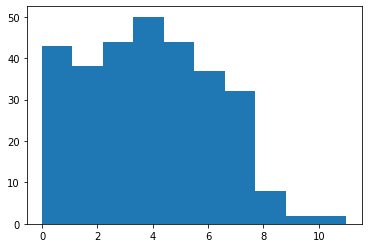

Var: 4.886666666666667


In [10]:
X_sum = sample_mat.sum(axis=1)
plt.hist(X_sum)
plt.show()
print(f'Var: {np.var(X_sum)}')

## Аналогичные результаты для MSE

Correlated yet: 9898
Correlated yet: 9896
Correlated yet: 9892
Correlated yet: 9888
Correlated yet: 9886
Correlated yet: 9884
Correlated yet: 9882
Correlated yet: 9880
Correlated yet: 9870
Correlated yet: 9868
Correlated yet: 9864
Correlated yet: 9862
Correlated yet: 9846
Correlated yet: 9840
Correlated yet: 9836
Correlated yet: 9834
Correlated yet: 9828
Correlated yet: 9814
Correlated yet: 9808
Correlated yet: 9806
Correlated yet: 9800
Correlated yet: 9798
Correlated yet: 9796
Correlated yet: 9792
Correlated yet: 9788
Correlated yet: 9782
Correlated yet: 9780
Correlated yet: 9776
Correlated yet: 9774
Correlated yet: 9750
Correlated yet: 9748
Correlated yet: 9746
Correlated yet: 9744
Correlated yet: 9740
Correlated yet: 9736
Correlated yet: 9732
Correlated yet: 9730
Correlated yet: 9728
Correlated yet: 9724
Correlated yet: 9704
Correlated yet: 9702
Correlated yet: 9684
Correlated yet: 9682
Correlated yet: 9676
Correlated yet: 9674
Correlated yet: 9670
Correlated yet: 9616
Correlated ye

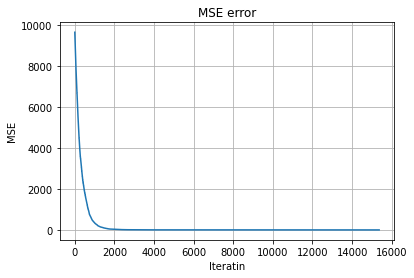

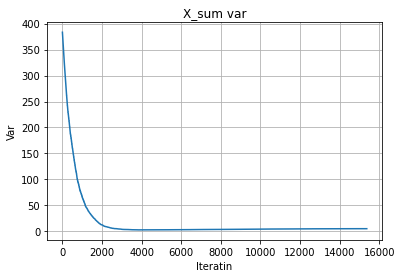

Error: 19.030171682099134
Var: 5.1866666666666665


In [11]:
sample_mat, err_lst, var_lst = corr_mat_optimizer(corr_mat_mse, p, n, m, EPS=EPS)

plot_err(err_lst, var_lst, 'MSE')
print(f'Error: {err_lst[-1]}')
print(f'Var: {var_lst[-1]}')

Количество элементов матрицы корреляции, отличающихся от заданной с 0.01 вне диагонали, более чем на 0.1: 0


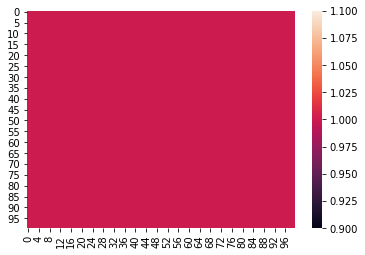

In [12]:
sns.heatmap(np.abs(sample_mat.corr().to_numpy() - target_corr_mat) < EPS)
print(f'Количество элементов матрицы корреляции, отличающихся от заданной с {R} вне диагонали, более чем на {EPS}: {(np.abs(sample_mat.corr().to_numpy() - target_corr_mat) > EPS).sum()}')

In [13]:
sample_mat.corr()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
X0,1.000000,-0.041667,-0.041667,0.045139,0.045139,0.045139,-0.041667,-0.041667,0.045139,-0.041667,...,0.045139,-0.041667,0.045139,-0.041667,0.045139,0.045139,0.045139,-0.041667,0.045139,-0.041667
X1,-0.041667,1.000000,-0.041667,0.045139,-0.041667,0.045139,-0.041667,-0.041667,-0.041667,-0.041667,...,0.045139,0.045139,0.045139,-0.041667,0.045139,0.045139,0.045139,0.045139,0.045139,-0.041667
X2,-0.041667,-0.041667,1.000000,0.045139,0.045139,-0.041667,-0.041667,-0.041667,0.045139,0.045139,...,-0.041667,-0.041667,-0.041667,0.045139,-0.041667,-0.041667,0.045139,0.045139,-0.041667,0.045139
X3,0.045139,0.045139,0.045139,1.000000,0.045139,-0.041667,-0.041667,-0.041667,0.045139,-0.041667,...,0.045139,-0.041667,-0.041667,-0.041667,0.045139,-0.041667,-0.041667,0.045139,-0.041667,-0.041667
X4,0.045139,-0.041667,0.045139,0.045139,1.000000,-0.041667,0.045139,-0.041667,0.045139,0.045139,...,0.045139,0.045139,-0.041667,0.045139,0.045139,0.045139,-0.041667,0.045139,0.045139,0.045139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X95,0.045139,0.045139,-0.041667,-0.041667,0.045139,-0.041667,0.045139,-0.041667,-0.041667,0.045139,...,0.045139,0.045139,0.045139,-0.041667,-0.041667,1.000000,0.045139,-0.041667,0.045139,-0.041667
X96,0.045139,0.045139,0.045139,-0.041667,-0.041667,-0.041667,0.045139,-0.041667,0.045139,0.045139,...,0.045139,0.045139,0.045139,-0.041667,0.045139,0.045139,1.000000,-0.041667,0.045139,-0.041667
X97,-0.041667,0.045139,0.045139,0.045139,0.045139,0.045139,0.045139,-0.041667,-0.041667,-0.041667,...,0.045139,-0.041667,0.045139,0.045139,0.045139,-0.041667,-0.041667,1.000000,0.045139,-0.041667
X98,0.045139,0.045139,-0.041667,-0.041667,0.045139,-0.041667,0.045139,-0.041667,-0.041667,0.045139,...,-0.041667,0.045139,0.045139,0.045139,-0.041667,0.045139,0.045139,0.045139,1.000000,0.045139


## Гистограмма и дисперсия для случая MSE

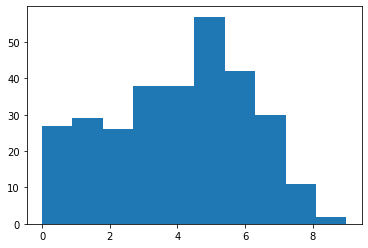

Var: 5.1866666666666665


In [14]:
X_sum = sample_mat.sum(axis=1)
plt.hist(X_sum)
plt.show()
print(f'Var: {np.var(X_sum)}')